# CDS503 - Lab 2: Decision Trees


Here are list important lines to import required libraries (Decision Trees):

**Model Training**
- `from sklearn.model_selection import train_test_split` - we use the `train_test_split()` function
- `from sklearn.tree import DecisionTreeClassifier` - this is the **Decision Tree classifier**! _(also recall the same line for **KNN classifier**_.

**Model Evaluation**
- `from sklearn import metrics` - we call `metrics.accuracy_score` function from this library.
- `from sklearn.metrics import classification_report, confusion_matrix` - we call `classification_report()` and `confusion_matrix()` from this library

**Visualization** - exclusive to Decision Trees only.
- `import sklearn.tree as tree` - we call `tree.export_graphviz()`
- `import pydotplus` - we call `pydotplus.graph_from_dot_data()`
- `from sklearn.externals.six import StringIO` - we call `StringIO()`
- `from IPython.display import Image` - we call `Image()`
- `from sklearn.tree.export import export_text` - we call `export_text()`

_My helper functions are annotated with_ `# @ym_helper_classification` _after the line._

## Prepare Data 

In [1]:
import pandas as pd

# This line specifies the path of "ym_helper_classification.py" file
# which contains my helper functions =D
%run "/Users/Darren Lee/ym_helper_classification"

In [2]:
import os
os.getcwd()

'C:\\Users\\Darren Lee\\CDS503 1920'

In [3]:
# This is the exported file from previous Lab 2: KNN.
df = pd.read_csv("titanic_unscaled.csv")

In [4]:
# View number of rows and columns
df.shape

(887, 7)

In [5]:
# View the last 5 rows
df.tail()

,survived,pclass,sex,age,sibspouse,parchild,fare
882,0,2,1,27.0,0,0,13.00
883,1,1,0,19.0,0,0,30.00
884,0,3,0,7.0,1,2,23.45
885,1,1,1,26.0,0,0,30.00
886,0,3,1,32.0,0,0,7.75


In [6]:
# Examine the data types of each column
df.dtypes

survived       int64
pclass         int64
sex            int64
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

In [7]:
# convert some columns into string to regain their categorical properties.
# @testlee0310: short hand method to do this.
columns = ['survived', 'pclass', 'sex']
df[columns] = df[columns].astype(str)

df.dtypes

survived      object
pclass        object
sex           object
age          float64
sibspouse      int64
parchild       int64
fare         float64
dtype: object

## Train and Validate Decision Tree Classifier

Let's indicate the target (class label) to be predicted, and the columns that will be served as features.

### 1. Indicate Target Class & Features

In [8]:
# Target: the label
target = df['survived']

# Features: the attributes
features = df.drop('survived', axis = 1)

### 2. Split the Dataset

In [9]:
from sklearn.model_selection import train_test_split

size = 0.2

# Split into (Train + Validate) set & Test set
x, x_test, y, y_test = train_test_split(features, target, test_size = size, random_state = 0)

# Split into Train & Validate set
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = size, random_state = 10)

### 3. Train the (Decision Tree) Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 4. Predict the Target - Using Development (Validation) Set

In [11]:
dev_predict = dtree.predict(x_dev)
dev_predict

array(['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1',
       '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1'],
      dtype=object)

### 5. Evaluation

#### Accuracy

Refer [**Lab 2 - KNN**](http://localhost:8888/notebooks/CDS503%201920/CDS503%20-%20Lab%202%20-%20KNN.ipynb) for more info.

In [12]:
# from sklearn import metrics
# @testlee0311: redundant import, so comment it!

accuracy = metrics.accuracy_score(y_dev, dev_predict)
print("Accuracy: {0}".format(accuracy))

Accuracy: 0.8450704225352113


#### Confusion Matrix & Classification Report

Here, confusion matrix consists of the metrics such as TP, FP, FN & TN.

Whereas the classification report consists of other performance metrics such as Precision, Recall, F1 Score and Support.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print(">>> Printing the confusion matrix...")
print(confusion_matrix(y_dev, dev_predict))

print("\n>>> Printing the classification report...")
print(classification_report(y_dev, dev_predict))

>>> Printing the confusion matrix...
[[75 10]
 [12 45]]

>>> Printing the classification report...
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        85
           1       0.82      0.79      0.80        57

    accuracy                           0.85       142
   macro avg       0.84      0.84      0.84       142
weighted avg       0.84      0.85      0.84       142



## Tune Parameters 

For decision tree (`DecisionTreeClassifier()`) important parameters include:

### `criterion`
The attribute selection measure - "gini" _(default)_ for the **Gini index** & "entropy" for the **information gain**.

### `splitter`
Split strategy - "best" _(default)_ for **best split** & "random" for **random split**.

### `max_depth`
Maximum depth of a tree - `None` _(default)_: nodes are expanded until all the leaves contain less than `min_samples_split` samples.

Higher value causes **overfitting**, whereas lower value causes **underfitting**.

and [other parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [14]:
# @testlee0311: repeat the whole process - without parameter tuning
# just to test my helper function
dtree, _ = tune_decision_tree(x_train, y_train, x_dev, y_dev, 
                              print_pred = True, print_report = True)  # @ym_helper_classification

Predicted results are:
 ['0' '1' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1'
 '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1'
 '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1'
 '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0'
 '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0'
 '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '1' '1'] 

Accuracy: 0.8450704225352113
>>> Printing the confusion matrix...
[[74 11]
 [11 46]]

>>> Printing the classification report...
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        85
           1       0.81      0.81      0.81        57

    accuracy                           0.85       142
   macro avg       0.84      0.84      0.84       1

In [15]:
dtree, _ = tune_decision_tree(x_train, y_train, x_dev, y_dev, mdpt = 3, 
                              print_pred = True, print_report = True)  # @ym_helper_classification

# @testlee0311: This is to compare KNN with decision tree
opt_depth = 0
max_val = 0.0

print("Find optimum max_depth:\n")

for depth in range(1,30):
    print("max_depth: {0}\t|".format(depth), end = ' ')
    _, acc = tune_decision_tree(x_train, y_train, x_dev, y_dev, mdpt = depth)  # @ym_helper_classification
    
    if acc > max_val:
        opt_depth = depth
        max_val = acc

print("\nThe optimum max_depth value is {0} with validation accuracy {1}.".format(opt_depth, max_val))

Predicted results are:
 ['0' '1' '1' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0'
 '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '0' '1' '1'
 '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1'] 

Accuracy: 0.8450704225352113
>>> Printing the confusion matrix...
[[78  7]
 [15 42]]

>>> Printing the classification report...
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        85
           1       0.86      0.74      0.79        57

    accuracy                           0.85       142
   macro avg       0.85      0.83      0.83       1

## Visualize Decision Trees 

C:\Users\Darren Lee\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


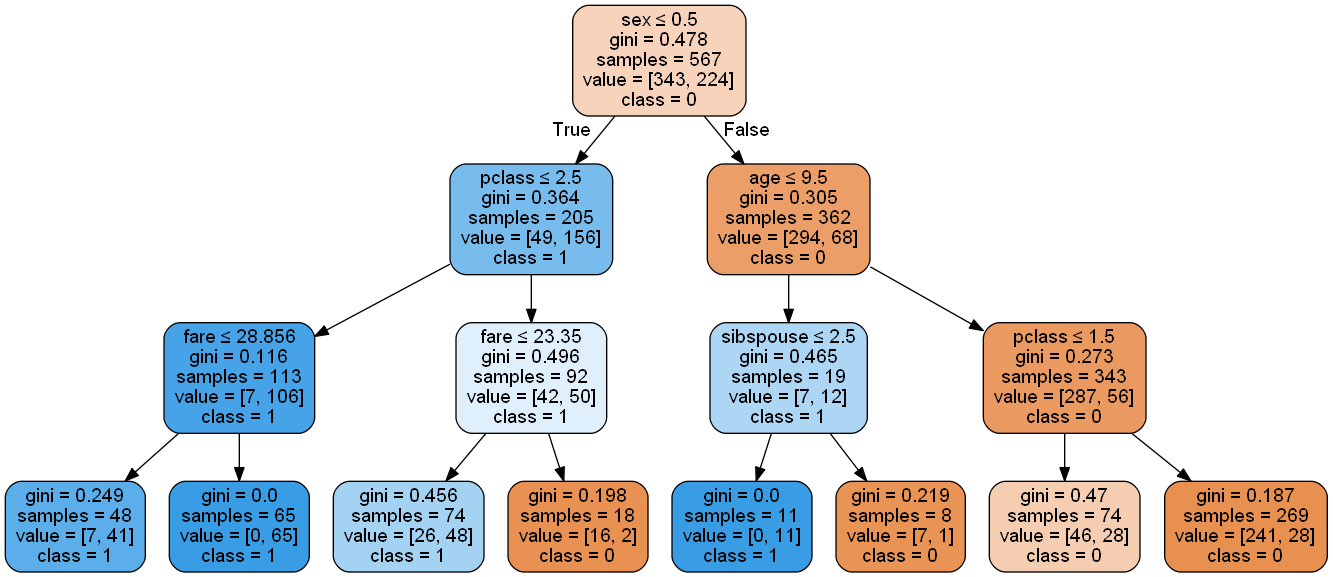

In [16]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

# Visualize decision tree
dot_data = StringIO()

# Tree.export_graphviz
tree.export_graphviz(dtree,
                    out_file = dot_data,
                    class_names = ['0', '1'],
                    feature_names = features.columns,
                    filled = True,
                    rounded = True,
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
# Load export_text library
from sklearn.tree.export import export_text

tree_rules = export_text(dtree, feature_names = list(x_train))

# Print decision tree rules
print(tree_rules)

|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 23.35
|   |   |   |--- class: 1
|   |   |--- fare >  23.35
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- age <= 9.50
|   |   |--- sibspouse <= 2.50
|   |   |   |--- class: 1
|   |   |--- sibspouse >  2.50
|   |   |   |--- class: 0
|   |--- age >  9.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- class: 0

